In [1]:
# Importamos todas las librerias que vamos a usar para este programa.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Guardamos cada uno de los dataframes en variables diferentes.
aisles_df = pd.read_csv('aisles.csv')
departments_df = pd.read_csv('departments.csv')
order_products_prior_df = pd.read_csv('order_products__prior.csv')
order_products_train_df = pd.read_csv('order_products__train.csv')
orders_df = pd.read_csv('orders.csv')
products_df = pd.read_csv('products.csv')

In [3]:
# Mostramos el encabezado de los dataframes.
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
# Mostramos el encabezado de los dataframes.
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
# Mostramos el encabezado de los dataframes.
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [6]:
# Mostramos el encabezado de los dataframes.
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [7]:
# Mostramos el encabezado de los dataframes.
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [8]:
# Mostramos el encabezado de los dataframes.
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [9]:
# Creamos una variable merge, la cual se almacena todos los dataframes juntos dependiendo del id que seleccionamos para realizar la conexion.
merge_df = order_products_prior_df
merge_df = pd.merge(merge_df, products_df, on='product_id', how='left')
merge_df = pd.merge(merge_df, aisles_df, on='aisle_id', how='left')
merge_df = pd.merge(merge_df, departments_df, on='department_id', how='left')
merge_df = pd.merge(merge_df, orders_df, on='order_id', how='left')
merge_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


In [10]:
# Aqui creamos con ayuda de la funcion crosstab, un dataframe el cual nos demuestra que usuarios ha comprado cierta cantidad de productos.
users_aisles_df = pd.crosstab(merge_df['user_id'], merge_df['aisle'])
users_aisles_df
# Por ejemplo, podemos observar como el usuario 2 ha comprado 3 veces asian foods, o el usuario 3 ha comprado 4 veces spreads.
# Incluso, podemos observar como el usuario 2 ha consumido yogurt hasta 42 veces, o el usuario 206208 hasta 33 veces.

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
206206,0,4,0,0,0,0,4,1,0,0,...,1,0,0,0,0,1,0,1,0,0
206207,0,0,0,0,1,0,0,0,0,0,...,3,4,0,2,1,0,0,11,0,15


In [11]:
# Aqui unicamente queremos ver la forma que tiene nuestro dataframe.
users_aisles_df.shape

(206209, 134)

In [12]:
# Y aqui lo describimos para conocer valores sobre su media, desviacion estandar, maximos, entre otros valores.
users_aisles_df.describe()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
count,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000,...,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000,206209.000000
mean,0.096266,0.807952,0.039572,0.041613,1.854701,0.169105,1.584276,0.114893,0.029911,0.235960,...,1.403431,1.209166,0.627878,0.937384,0.172592,0.155575,0.218511,4.080971,0.148189,7.043063
std,0.728536,2.438233,0.532817,0.371400,11.144575,1.109605,3.819624,0.574782,0.272030,3.036664,...,3.441071,5.316325,3.316950,2.831621,1.300779,0.762345,1.103784,11.275365,1.743848,18.399355
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,7.000000
max,54.000000,107.000000,47.000000,27.000000,806.000000,62.000000,160.000000,68.000000,26.000000,541.000000,...,130.000000,382.000000,241.000000,103.000000,83.000000,71.000000,72.000000,510.000000,161.000000,1522.000000


c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

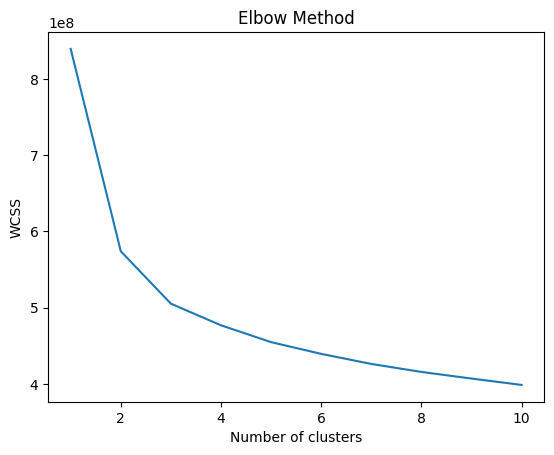

In [13]:
# Aqui empezamos con buscar el valor optimo para nuestra cantidad de clusters, en este caso, con ayuda del metodo elbow. 
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(users_aisles_df.iloc[:,1:])
    wcss.append(kmeans.inertia_)

#Finalmente imprimimos la grafica que nos dio
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# Podemos observar que en el metodo, el lugar donde la curva deja de ser tan en picada, es al rededor del valor 3, por lo que podriamos considerarlo el valor optimo de clusters.

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


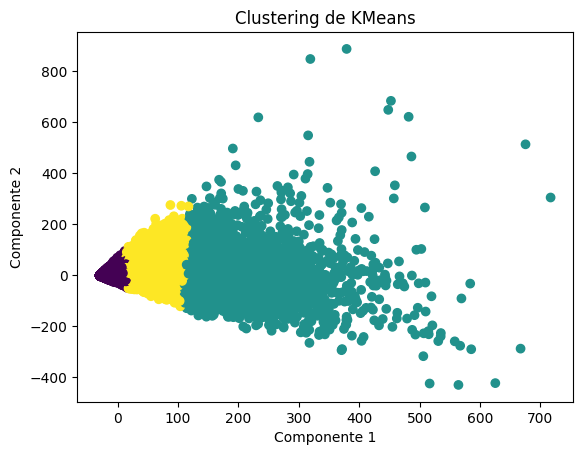

In [14]:
# En este caso, hacemos uso del PCA para poder reducir el dataframe a una cantidad de 2 componentes unicamente, los cuales utilizaremos para realizar el Kmeans.
pca = PCA(n_components=2)
pca_clients_aisle = pca.fit_transform(users_aisles_df)

# Una vez se realizo el PCA, realizamos el Kmeans, seleccionando 3 clusters que fue la cantidad que consideramos optimas para realizar los clusters.
kmeans = KMeans(n_clusters=3)
cluster_labels = kmeans.fit_predict(pca_clients_aisle)

# Aqui finalmente, realizamos el diagrama con el Kmeans que realizamos para poder visualizar los tres clusters y como son distribuidos.
plt.scatter(pca_clients_aisle[:, 0], pca_clients_aisle[:, 1], c=cluster_labels)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.title('Clustering de KMeans')
plt.show()

# En este caso, podemos ver como los usuarios empiezan desde un punto 0, llegando hasta maximos de 800 en el componente 2 mientras en el componenete 1 no llegan a ese nivel.

In [15]:
# Como vemos, tenemos 3 diferentes clusters, por lo que vamos a separarlos en una columna perteneciente.
# Aqui asignamos una nueva columna, la cual es cluster, en donde vamos a guardar si pertenece al cluster 1, 2 o 3. 
users_aisles_df['cluster'] = np.where(cluster_labels == 0, '1', np.where(cluster_labels == 1, '2', '3'))
users_aisles_df
# Podemos observar como ahora tenemos la nueva columna, con el numero por cada cluster. 

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,3,0,0,0,0,2,0,0,0,...,1,1,0,0,0,0,2,0,42,1
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,1
206206,0,4,0,0,0,0,4,1,0,0,...,0,0,0,0,1,0,1,0,0,1
206207,0,0,0,0,1,0,0,0,0,0,...,4,0,2,1,0,0,11,0,15,1


In [16]:
# Ahora, como anteriormente no vemos los diferentes valores, solo observamos un 3, por lo que queremos verificar que nuestros clusters si se hayan separado de manera correcta, por lo que podemos hacer una 
# busqueda y ver cuanta cantidad de cada uno de los clusters tenemos dento del dataframe, ya sea uno/dos/tres. 
cantidad_por_cluster = users_aisles_df['cluster'].value_counts()
cantidad_por_cluster

# Podemos ver que para el cluster 1, tenemos 167061, para el 3 tenemos 32205 y para el 2 tenemos 6943

1    166921
3     32287
2      7001
Name: cluster, dtype: int64

In [17]:
# Aqui lo que hacemos, es definir el cluster que vamos a utilizar, en este caso, utilizaremos el cluster '2' y lo guardamos para visualizar mas adelante.
cluster_dos_df = users_aisles_df[users_aisles_df['cluster'] == '2']
cluster_dos_df
# Como podemos ver, ya no tenemos ningun cluster '1', por lo que verificamos que es correcto.

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
140,0,1,0,0,152,0,10,0,0,0,...,1,6,10,0,0,0,8,0,49,2
210,0,7,0,0,5,0,8,0,0,0,...,0,92,13,0,0,0,18,0,98,2
214,0,2,1,0,0,1,6,0,0,0,...,32,2,0,0,0,1,8,0,10,2
223,0,0,0,0,0,0,2,0,0,0,...,3,0,1,0,0,3,0,0,101,2
232,0,4,0,0,0,0,3,1,0,0,...,0,4,0,0,0,0,43,0,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206045,0,4,0,0,0,0,5,0,0,0,...,0,16,0,0,0,0,0,0,7,2
206053,0,1,0,0,0,0,0,0,0,0,...,0,9,3,0,1,0,0,0,28,2
206079,0,4,0,0,0,0,4,0,0,0,...,0,17,5,0,0,4,26,0,16,2


In [18]:
cluster_dos_df['Cantidad de productos'] = cluster_dos_df.sum(axis=1)
cluster_dos_df

# Ahora, aqui podemos visualizar que creamos una nueva columna para cantidad, en la cual podemos ver que cada usuario compro un maximo de productos,
# en este caso, el usuario 140 compro al rededor de 152 productos del baby food formula, y el usuario 210 compro 92 tofu meat alternatives.

C:\Users\PC\AppData\Local\Temp\ipykernel_6748\2139190054.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cluster_dos_df['Cantidad de productos'] = cluster_dos_df.sum(axis=1)
C:\Users\PC\AppData\Local\Temp\ipykernel_6748\2139190054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_dos_df['Cantidad de productos'] = cluster_dos_df.sum(axis=1)


aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,cluster,Cantidad de productos
user_id,,,,,,,,,,,,,,,,,,,,,
140,0,1,0,0,152,0,10,0,0,0,...,6,10,0,0,0,8,0,49,2,1151
210,0,7,0,0,5,0,8,0,0,0,...,92,13,0,0,0,18,0,98,2,1476
214,0,2,1,0,0,1,6,0,0,0,...,2,0,0,0,1,8,0,10,2,479
223,0,0,0,0,0,0,2,0,0,0,...,0,1,0,0,3,0,0,101,2,643
232,0,4,0,0,0,0,3,1,0,0,...,4,0,0,0,0,43,0,10,2,445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206045,0,4,0,0,0,0,5,0,0,0,...,16,0,0,0,0,0,0,7,2,429
206053,0,1,0,0,0,0,0,0,0,0,...,9,3,0,1,0,0,0,28,2,948
206079,0,4,0,0,0,0,4,0,0,0,...,17,5,0,0,4,26,0,16,2,964


In [19]:
# Maestra, estuve tratando de hacer las reglas de asociacion en base al dataframe cluster 2, pero no logre hacerlo, si me pudiera ayudar o explicar si a lo mejor hice mal en como
# lo plantee o como lo pudiera hacer. 

In [20]:
# Aqui creamos un nuevo dataframe donde guardaremos los valores de los productos y el order_products, asi podemos observar cada uno de los productos y sus caracteristicas.
order_products_merge_df = pd.merge(order_products_prior_df,products_df,how='inner',on='product_id')
order_products_merge_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,26,33120,5,0,Organic Egg Whites,86,16
2,120,33120,13,0,Organic Egg Whites,86,16
3,327,33120,5,1,Organic Egg Whites,86,16
4,390,33120,28,1,Organic Egg Whites,86,16


In [21]:
# Aqui establecemos un limite en base al order id que sea menor a 50k. De esta forma podemos optimizar el procesamiento y poder manejar una cantidad de datos considerable a porocesar.
order_products_merge_df = order_products_merge_df[order_products_merge_df['order_id']<50000]

In [22]:
# Aqui eliminamos todas las columnas que no nos pueden ayudar a realizar la asociacion, las cuales podrian ser el ID de producto, aisle, deparment y otros como reordered y add to cart.
items_df = order_products_merge_df.drop(columns=['product_id', 'add_to_cart_order', 'reordered', 'aisle_id', 'department_id'])
# Tambien creamos una variable suma, la cual vamos a utilizar mas adelante.
items_df['suma']=1
items_df

,order_id,product_name,suma
0,2,Organic Egg Whites,1
1,26,Organic Egg Whites,1
2,120,Organic Egg Whites,1
3,327,Organic Egg Whites,1
4,390,Organic Egg Whites,1
...,...,...,...
31855056,49964,NyQuil Severe Cold & Flu and DayQuil Severe Co...,1
31855133,49965,Honey Lemon Menthol Cough Suppressant Drops,1
31855151,49965,Coconut Curling Cream,1
31855155,49982,Arroz Calasparra Paella Rice,1


In [23]:
# Aqui lo primero que hacemos es agrupar por el order, y el name. Utilizamos la columna que previamente teniamos para realizar la suma y utilizamos el fillna, para asi los valores
# que no tengan algun valor o esten como NaN cambien a 0. 
association_df = items_df.groupby(['order_id','product_name'])['suma'].sum().unstack().fillna(0)
association_df

product_name,#2 Coffee Filters,#2 Cone White Coffee Filters,#4 Natural Brown Coffee Filters,& Go! Hazelnut Spread + Pretzel Sticks,0 Calorie Acai Raspberry Water Beverage,0 Calorie Fuji Apple Pear Water Beverage,0 Calorie Strawberry Dragonfruit Water Beverage,0% Fat Black Cherry Greek Yogurt y,0% Fat Blueberry Greek Yogurt,0% Fat Free Organic Milk,...,with Dawn Action Pacs Fresh Scent Dishwasher Detergent Pacs,with Olive Oil Mayonnaise,with Olive Oil Mayonnaise Dressing,with Seasoned Roasted Potatoes Scrambled Eggs & Sausage,with Sweet & Smoky BBQ Sauce Cheeseburger Sliders,with Xylitol Cinnamon 18 Sticks Sugar Free Gum,with Xylitol Minty Sweet Twist 18 Sticks Sugar Free Gum,with Xylitol Original Flavor 18 Sticks Sugar Free Gum,with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,with a Splash of Mango Coconut Water
order_id,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Creamos un dataframe para poder conocer que items son los mas frecuentes y utilizarlos en los metodos.
# En este caso, para realizar el analisis de asociacion hacemos uso del metodo apriori, estableciendo que el min_support para que se considere frecuente es de 0.01.
# Y de igual forma utilizamos las columnas para los nombres en vez de un index. 
items_frequentes_df = apriori(association_df, min_support=0.01, use_colnames=True)
items_frequentes_df.head()

# Podemos observar el support, el cual nos ensena que tanto porcentaje se muestra ese producto en especifico dentro de los datasets.

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.011873,(100% Raw Coconut Water)
1,0.018928,(100% Whole Wheat Bread)
2,0.011681,(2% Reduced Fat Milk)
3,0.027155,(Apple Honeycrisp Organic)
4,0.019908,(Asparagus)


In [25]:
# Finalmente, establecemos reglas de asociacion, donde establecemos el dataframe, utilizamos el metrico de lift para poder conocer la fuerza que tienen estas reglas.
regla = association_rules(items_frequentes_df, metric='lift', min_threshold=1)
regla.sort_values(by='confidence')

# Aqui podemos observar los productos antecedentes y consequentes, los cuales son los que se pueden llegar a considerar una conexion, considerando lift, leverage y zhangs_metric
# las cuales nos ayudan a observar la probabilidad de que se junten ambos productos, ya que si son mayores a 1, se considera que son mas propensos a que se tengan ambos. 

# Por ejemplo, podemos observar que en el caso de Banana y Organic Fuji Apple, tienen un valor mayor a 1, por lo que es probable que se lleven esos productos juntos usualmente.
# Mientras que en el caso de Organic Hass Avocado y Banana no es tan probable, aun que si se tiene una probabilidad considerable.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
15,(Banana),(Organic Fuji Apple),0.148481,0.028349,0.010189,0.068619,2.420497,0.005979,1.043237,0.689194
17,(Banana),(Organic Hass Avocado),0.148481,0.067271,0.010508,0.070772,1.052054,0.000520,1.003768,0.058106
20,(Banana),(Strawberries),0.148481,0.044911,0.012746,0.085846,1.911459,0.006078,1.044779,0.559987
9,(Banana),(Large Lemon),0.148481,0.047384,0.012938,0.087138,1.838982,0.005903,1.043549,0.535773
5,(Bag of Organic Bananas),(Organic Raspberries),0.119365,0.043952,0.013450,0.112679,2.563683,0.008204,1.077454,0.692609
12,(Banana),(Organic Baby Spinach),0.148481,0.076436,0.016732,0.112690,1.474306,0.005383,1.040858,0.377813
11,(Banana),(Organic Avocado),0.148481,0.054759,0.016924,0.113982,2.081539,0.008794,1.066842,0.610188
19,(Banana),(Organic Strawberries),0.148481,0.081147,0.018438,0.124175,1.530247,0.006389,1.049128,0.406933
29,(Organic Strawberries),(Organic Raspberries),0.081147,0.043952,0.010103,0.124507,2.832817,0.006537,1.092012,0.704133
1,(Bag of Organic Bananas),(Organic Baby Spinach),0.119365,0.076436,0.016157,0.135357,1.770853,0.007033,1.068145,0.494303
